In [9]:
import pandas as pd


df = pd.read_csv("/Online Retail FI.csv", encoding='latin1')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [14]:
#specified details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
#rows and columns in dataset
print("Rows:", len(df))t
print("Columns:", len(df.columns))

Rows: 541909
Columns: 8


In [ ]:
#DATA CLEANING

In [12]:
#cleaning rows with unwanted and null values
df = df.dropna()

print("Rows after cleaning:", len(df))

Rows after cleaning: 406829


In [15]:
#Remove returned items
df = df[df['Quantity'] > 0]

#Remove invalid prices
df = df[df['UnitPrice'] > 0]

print("Rows after removing invalid data:", len(df))

Rows after removing invalid data: 397884


In [16]:
#Converting Invoice format into Date format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()

/tmp/ipython-input-937185307.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [19]:
#Creating sales column
df['Sales'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
#Convert to montly sales
monthly_sales = df.resample('M', on='InvoiceDate')['Sales'].sum()

monthly_sales = monthly_sales.reset_index()

monthly_sales.head()

/tmp/ipython-input-4153882695.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='InvoiceDate')['Sales'].sum()


,InvoiceDate,Sales
0,2010-01-31,46376.49
1,2010-02-28,47316.53
2,2010-03-31,23921.71
3,2010-04-30,0.00
4,2010-05-31,31771.60


In [22]:
len(monthly_sales)

24

In [24]:
#creating time based features
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.month
monthly_sales['Year'] = monthly_sales['InvoiceDate'].dt.year
monthly_sales['Quarter'] = monthly_sales['InvoiceDate'].dt.quarter

monthly_sales.head()


,InvoiceDate,Sales,Month,Year,Quarter
0,2010-01-31,46376.49,1,2010,1
1,2010-02-28,47316.53,2,2010,1
2,2010-03-31,23921.71,3,2010,1
3,2010-04-30,0.00,4,2010,2
4,2010-05-31,31771.60,5,2010,2


In [25]:
monthly_sales['TimeIndex'] = range(len(monthly_sales))

monthly_sales.head()


,InvoiceDate,Sales,Month,Year,Quarter,TimeIndex
0,2010-01-31,46376.49,1,2010,1,0
1,2010-02-28,47316.53,2,2010,1,1
2,2010-03-31,23921.71,3,2010,1,2
3,2010-04-30,0.00,4,2010,2,3
4,2010-05-31,31771.60,5,2010,2,4


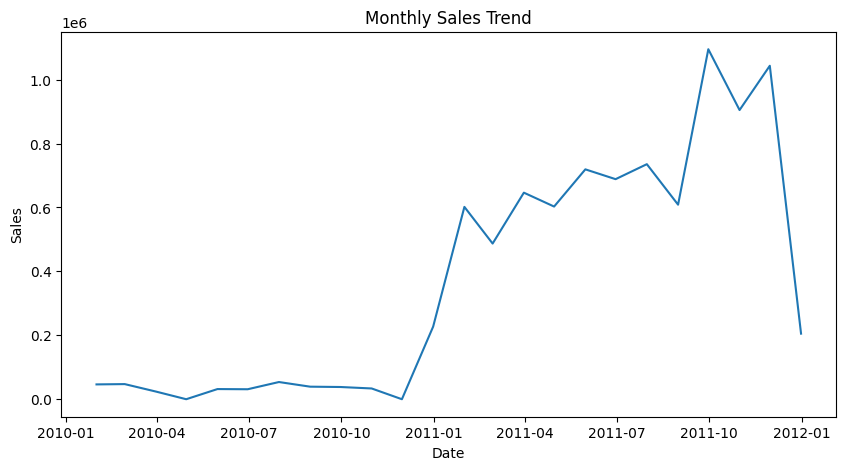

In [27]:
#Data visulaization (every 4 month trend of 3 years)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(monthly_sales['InvoiceDate'],
         monthly_sales['Sales'])

plt.title("Monthly Sales Trend")

plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

In [28]:
train = monthly_sales[:-3]
test = monthly_sales[-3:]

print("Training months:", len(train))
print("Testing months:", len(test))

Training months: 21
Testing months: 3


In [29]:
from sklearn.linear_model import LinearRegression

X_train = train[['TimeIndex']]
y_train = train['Sales']

X_test = test[['TimeIndex']]
y_test = test['Sales']

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Predictions:", predictions)


Predictions: [865669.43423333 915111.33252294 964553.23081255]


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 308939.71801875904
RMSE: 445206.0921642782


In [31]:
future_index = pd.DataFrame({
    'TimeIndex': range(len(monthly_sales), len(monthly_sales) + 6)
})

future_predictions = model.predict(future_index)

print(future_predictions)

[1013995.12910216 1063437.02739177 1112878.92568139 1162320.823971
 1211762.72226061 1261204.62055022]


/tmp/ipython-input-2267052859.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


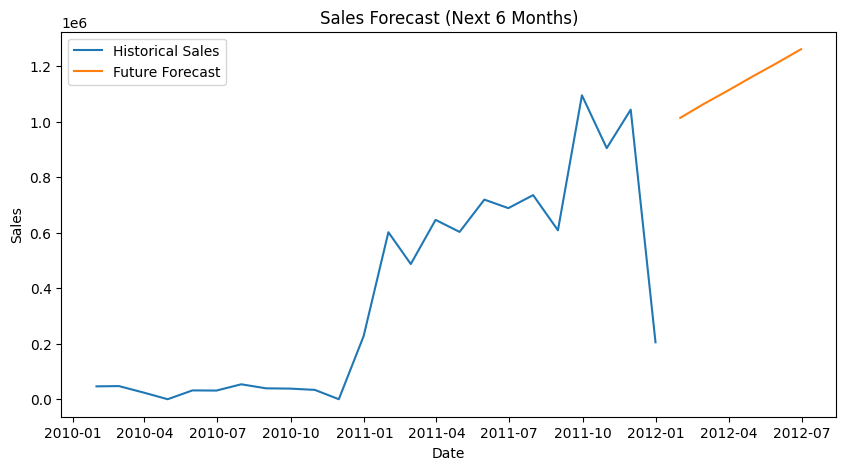

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Create future dates
future_dates = pd.date_range(
    start=monthly_sales['InvoiceDate'].iloc[-1],
    periods=7,
    freq='M'
)[1:]

plt.figure(figsize=(10,5))

# Historical Sales
plt.plot(monthly_sales['InvoiceDate'],
         monthly_sales['Sales'],
         label='Historical Sales')

# Future Forecast
plt.plot(future_dates,
         future_predictions,
         label='Future Forecast')

plt.title("Sales Forecast (Next 6 Months)")

plt.xlabel("Date")
plt.ylabel("Sales")

plt.legend()

plt.show()